# About dataset
CIFAR-10  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.
The label classes in the dataset are:

1 airplane
2 automobile 
3bird 
4 cat 
5 deer 
6 dog 
7 frog 
8 horse 
9 ship 
10 truck

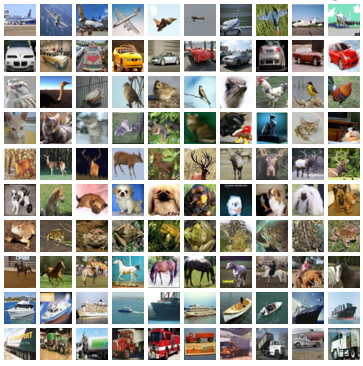


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets,layers,models

# Importing the dataset

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

Here we see there are 50000 training images and 1000 test images

In [7]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

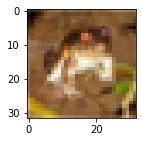

In [8]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[0])

In [9]:
y_train.ndim

2

In [10]:
y_train=y_train.reshape(-1,)

In [11]:
y_train.ndim

1

In [12]:
y_test=y_test.reshape(-1,)

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
#defining function to view the imgae with label

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

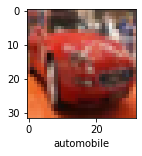

In [15]:
plot_sample(x_train,y_train,5)

# Normalization of the training data

In [16]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

# Building the simple artificial neural network (ANN) for image classification

In [17]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# sparse_categorical_crossentropy used when class is label encoded 
# categorical_cross_entropy used when have the one hot encoded label

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 103s 65ms/step - loss: 1.8138 - accuracy: 0.3557
Epoch 2/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.6243 - accuracy: 0.4282
Epoch 3/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.5428 - accuracy: 0.4553
Epoch 4/5
1563/1563 [==============================] - 110s 70ms/step - loss: 1.4817 - accuracy: 0.4798
Epoch 5/5
1563/1563 [==============================] - 110s 70ms/step - loss: 1.4340 - accuracy: 0.4967


You can see that at the end of 5 epochs, accuracy is at around 49%

# Evaluating the ANN model

In [29]:
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))
accuracy_score(y_test, y_pred_classes)

313/313 [==============================] - 6s 20ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.46      0.52      1000
           1       0.72      0.42      0.54      1000
           2       0.35      0.38      0.36      1000
           3       0.34      0.40      0.36      1000
           4       0.44      0.35      0.39      1000
           5       0.66      0.15      0.24      1000
           6       0.40      0.75      0.52      1000
           7       0.55      0.49      0.52      1000
           8       0.52      0.72      0.61      1000
           9       0.52      0.62      0.57      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.46     10000
weighted avg       0.51      0.47      0.46     10000

313/313 [==============================] - 7s 21ms/step


array([[0.02736708, 0.03307148, 0.22502309, ..., 0.00460278, 0.06750272,
        0.00649308],
       [0.05860099, 0.07991949, 0.00725088, ..., 0.00402131, 0.37258607,
        0.45864362],
       [0.27151883, 0.07914437, 0.01552075, ..., 0.01945737, 0.44643593,
        0.14130946],
       ...,
       [0.00328771, 0.00121194, 0.13896017, ..., 0.0251842 , 0.02948458,
        0.00824324],
       [0.01447727, 0.00372255, 0.1285816 , ..., 0.01619852, 0.00608866,
        0.00943695],
       [0.05519589, 0.00887047, 0.10816405, ..., 0.39694014, 0.01700115,
        0.02574705]], dtype=float32)

# Building  a convolutional neural network (CNN)to train our images

In [19]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.7735 - accuracy: 0.7351
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7311 - accuracy: 0.7462
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.6939 - accuracy: 0.7599
Epoch 4/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.6573 - accuracy: 0.7709
Epoch 5/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.6238 - accuracy: 0.7832
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.5926 - accuracy: 0.7933
Epoch 7/10
1563/1563 [==============================] - 40s 25ms/step - loss: 0.5632 - accuracy: 0.8030
Epoch 8/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.5398 - accuracy: 0.8098
Epoch 9/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.5116 - accuracy: 0.8203
Epoch 10/10
1563/1563 [==============================] - 40s 25m

<b> With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [23]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.8969 - accuracy: 0.6930


[0.8968874216079712, 0.6930000185966492]

In [34]:
a=cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in a]
accuracy_score(y_test,y_pred_classes)

313/313 [==============================] - 2s 7ms/step


0.693

In [32]:
cnn.predict(x_test)+

313/313 [==============================] - 2s 7ms/step


array([[7.9310844e-03, 3.1412620e-04, 1.5804842e-02, ..., 1.9345077e-04,
        1.2811060e-01, 2.7599695e-04],
       [1.2837477e-02, 2.9000112e-01, 1.4424687e-05, ..., 7.3790418e-09,
        6.8768185e-01, 9.4638532e-03],
       [1.6565153e-01, 3.0627477e-01, 1.3758597e-02, ..., 8.7990041e-04,
        4.8011965e-01, 2.5840139e-02],
       ...,
       [1.3133032e-04, 7.5709117e-06, 6.2232517e-02, ..., 4.2547598e-02,
        1.1931869e-04, 4.2461375e-05],
       [2.3752539e-03, 5.4216298e-04, 1.4478170e-03, ..., 1.9987123e-03,
        4.3426655e-05, 6.9966234e-05],
       [5.7929832e-05, 1.0226691e-04, 8.7083859e-04, ..., 9.8197120e-01,
        6.9350222e-06, 1.1967529e-04]], dtype=float32)